# Avaliação da disciplina Principios de Machine Learning <br> (PDSP-2002 FGV/EAESP)

Esse notebook contem o *starter-code* que voces devem utilizar para preparar e montar o modelo de Machine Learning que será utilizado na avaliação da disciplina. <br>
A avaliação se dará em etapas:

1. entrega do modelo + apresentação oral no dia 23/maio/23 (100% da nota da prova parcial). Nessa avaliação voces deverão apresentar seu entendimento sobre o problema, e uma proposta de solução.
2. coleta das predições dos seus modelos para algumas semanas de maio/23 (50% da nota da prova final)
3. apresentação final no dia 06/junho/23 (50% da nota da prova final). O restante da nota será atribuída conforme as predições que voces devem fazer para as seguintes semanas:
    * até 28/maio/23: predição para 2023-06-02
    * até 04/junho/23: predição para 2023-06-09
    * até 11/junho/23: predição para 2023-06-16

O trabalho poderá ser realizado em grupos de até 3 alunos <br>

## descrição do problema
O objetivo do exercicio será a predição de um target (baseado na captação liquida - vide seção 4) via algoritmo de machine learning. A idéia é treinar modelos com séries historicas de features (ex, numero de cotistas, captações, resgates,...) para prever o z-score da captação líquida na semana subsequente.  
Exemplo: dados as features semanais agregadas pela média:

| DT_COMPTC           |   CAPTC_DIA |   CAPTC_LIQ |   NR_COTST |   RESG_DIA |   VL_PATRIM_LIQ |   VL_QUOTA |    VL_TOTAL |
|:--------------------|------------:|------------:|-----------:|-----------:|----------------:|-----------:|------------:|
| 2021-01-08 00:00:00 |    321914   |     64800.3 |      143.6 |     257113 |     1.45469e+07 |    81.7644 | 1.45024e+07 |
| 2021-01-15 00:00:00 |    357137   |     -4233.1 |      143   |     361370 |     1.45689e+07 |    81.7548 | 1.45274e+07 |
| 2021-01-22 00:00:00 |    158175   |   -398803   |      143   |     556979 |     1.42905e+07 |    81.7599 | 1.42518e+07 |
| 2021-01-29 00:00:00 |     83628.7 |    -77183   |      143   |     160812 |     1.24528e+07 |    81.7566 | 1.24205e+07 |
| 2021-02-05 00:00:00 |    293881   |    127164   |      143   |     166717 |     1.29901e+07 |    81.7656 | 1.29428e+07 |
| 2021-02-12 00:00:00 |    141966   |    -45935.5 |      141.6 |     187902 |     1.30037e+07 |    81.7638 | 1.29616e+07 |

predizer o target:

| DT_COMPTC           |   target |
|:--------------------|------------:|
| 2021-02-19 00:00:00 |   -0.046732 |

Ver abaixo na seção 4, detalhes de como o target foi calculado.

As features já foram manipuladas para facilitar a execução do exercicio e correspondem à média semanal dos valores reportados no informe diário, 
e a data no índice (DT_COMPTC) corresponde a 6a feira, que representa a semana. Por exemplo, o valor de R$321914 contido na 1a linha e 1a coluna do dataframe de features acima,
corresponde a média de 5 dias (4/jan/21 à 8/jan/21) das captações diárias. 

Outros dois dataframes contem dados que podem ser utilizados como features: cadastro e laminas.
Esses dataframes contem uma mescla de dados numericos, categoricos e textuais.

## referencias
portal https://dados.cvm.gov.br/ <br>
https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/


## seleção dos fundos escopo do exercício:
A analise irá se limitar a um subconjunto de fundos definidos pelos seguintes critérios de seleção:

* seleção via dataframe informes:
    * fundos com tipo de fundo ('TP_FUNDO') 'FI'
    * fundos criados antes de 1/jun/2021
    * fundos com quantidade de cotistas ('NR_COTST') maior do que 100 no dia 3/jan/2022
* seleção via dataframe cadastro:
    * fundos com situação ('SIT') diferente de 'CANCELADA'
    * fundos com entradas duplicadas serão removidas, e apenas a ultima entrada será considerada (*\) 
    * fundos cuja classe ('CLASSE') é multi-mercado ('Fundo Multimercado') 


(\*) considero que a ordenação é cronologica, já que não encontrei a data de atualização (p. ex. de auditor ou gestor)

## roteiro sugerido para execução:
1. utilizar esse 'starter-code' para carregar os arquivos e manipular os dataframes
2. executar até a seção 5.1 (a 5.2 é opcional)
3. montar seu modelo na seção 5.3
4. montar suas predições na seção 6 para submissão

## avaliação do algoritmo "em produção":
Seu objetivo será prever o z-score da captação líquida para as semanas de avaliação <br>
50% da nota final será atribuída segundo o menor erro RMSE entre suas predições e o valor observado.<br>
Detalhes de como submeter suas predições serão informadas posteriormente.



## Dicas:
1. lookback & escolha do range de datas para treino são duas decisões que voces devem tomar (entre outras) que podem influenciar o desempenho
2. atenção para validação cruzada em problemas de séries temporais (i.e., split temporal, e não aleatorio) 

### obs1:
para os dados de 2020, acessar https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/HIST/ baixar o zip correspondente ao ano 2020, incluir no diretorio raw, e descompactar o zip. Um diretorio `inf_diario_fi_2020` será criado

### obs2:
voce pode seguir o roteiro abaixo para baixar o CDI, caso queira utilizá-lo como feature

1. acessar https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries
2. na busca (menu a esquerda) digitar "cdi"
3. selecionar "Interest rate - CDI accumulated in the month" (*\)
4. abaixo, clicar nos botões: "Add Series" e depois "Search Series"
5. clicar no botão: "View values"
6. ao abrir a série historica na página, acima da tabela a direita clicar em "CSV file" para baixar
7. mover o csv baixado para o diretorio raw. anotar o nome do arquivo e alterar abaixo no codigo abaixo (pd.read_csv())
    ```
    cdi = pd.read_csv(RAW_DATA_DIR / 'STI-20221103131759798.csv', sep=';')
    cdi.columns = ['Date', 'cdi']
    cdi['Date'] = pd.to_datetime(cdi['Date'], errors='coerce', ) + pd.tseries.offsets.MonthEnd(1)
    cdi = cdi.dropna()  # elimina linhas que não tem datetime na coluna 'Date'
    cdi = cdi.set_index('Date')
    cdi = cdi.astype(float)
    cdi = cdi['cdi']

    ultimo_mes = cdi.index[-1]
    drop_ultimo_mes = input(f'ultimo mes: {ultimo_mes} taxa talvez reflita mes incompleto. drop ("s" para sim?)')
    if drop_ultimo_mes[0].lower()=='s':
        cdi = cdi.drop(ultimo_mes)
    ```

-----

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 50
from pathlib import Path
import os

import matplotlib.pyplot as plt

from tqdm import tqdm

from datetime import datetime

DATA_DIR = Path('data')
DATA_DIR.mkdir(parents=True, exist_ok=True)

RAW_DATA_DIR = Path('raw')
RAW_DATA_DIR.mkdir(parents=True, exist_ok=True)

## 1. baixando arquivos zip do portal

In [2]:
def baixar_informes_diarios(start='2021-01', end='2023-05', force_download=False, path_local=None):
    """
    essa função somente funciona para os arquivos mensais em:
    https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/
    arquivos anteriores a 2020 (inclusive) encontram-se em 
    https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/HIST/
    onde está agrupado por ano (e não por mes)
    """
    informes_diarios_fn = f'informes_diarios_{start}_{end}.pkl'
    informes_diarios_fp = DATA_DIR / informes_diarios_fn

    if informes_diarios_fp.exists() and not force_download:
        print(f'lendo arquivo {informes_diarios_fn} previamente baixado')
        informes = pd.read_pickle(informes_diarios_fp)
    else:
        lista_de_informes_diarios = [str(d.year) + f'{d.month:02d}' for d in pd.date_range(start=start, end=end, freq='MS')]

        informes = list()
        for um_informe_diario in lista_de_informes_diarios:
            if path_local:
                path = os.path.join(path_local, f'inf_diario_fi_{um_informe_diario}.csv')
            else:
                URL = 'https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/'
                path = os.path.join(URL, f'inf_diario_fi_{um_informe_diario}.zip')
                print(f'baixando {path}')
            try:
                um_informe = pd.read_csv(path, sep=';')
                informes.append(um_informe)
            except:
                print(f'erro ao baixar {path}... skip')
                informes_diarios_fn = 'erro'+um_informe_diario + informes_diarios_fn
                informes_diarios_fp = DATA_DIR / informes_diarios_fn
        
        if informes:
            informes = pd.concat(informes)
            informes.to_pickle(informes_diarios_fp)
        
    return informes

In [3]:
informes_2021_2023 = baixar_informes_diarios('2021-01', '2023-04', force_download=False)
informes = informes_2021_2023

lendo arquivo informes_diarios_2021-01_2023-04.pkl previamente baixado


In [4]:
def busca_cadastro_cvm():
  
  try:
    url = 'http://dados.cvm.gov.br/dados/FI/CAD/DADOS/cad_fi.csv'
    return pd.read_csv(url, sep=';', encoding='ISO-8859-1')
  except: 
    print(f"Erro ao baixar {url}")

def busca_perfil_mensal_cvm():
  
  try:
    url = 'https://dados.cvm.gov.br/dados/FI/DOC/PERFIL_MENSAL/DADOS/perfil_mensal_fi_202208.csv'
    return pd.read_csv(url, sep=';', encoding='ISO-8859-1')
  except: 
    print(f"Erro ao baixar {url}")
    
from io import BytesIO
from zipfile import ZipFile
import requests    

def busca_laminas_cvm(ano_mes='202108'):
    try:
        url = f'https://dados.cvm.gov.br/dados/FI/DOC/LAMINA/DADOS/lamina_fi_{ano_mes}.zip'
        zipfile = requests.get(url)
        zipfile = ZipFile(BytesIO(zipfile.content))
        laminas = [zipfile.open(fn) for fn in zipfile.namelist() if fn==f'lamina_fi_{ano_mes}.csv']
        return pd.read_csv(laminas.pop(), sep=';', encoding='ISO-8859-1', on_bad_lines='warn')
    except: 
        print(f"Erro ao baixar {url}")

In [5]:
cadastro = busca_cadastro_cvm()
cadastro = cadastro.set_index('CNPJ_FUNDO')
cadastro = cadastro.loc[~cadastro.index.duplicated(keep='last')]

/var/folders/nx/1dvhf2v11632q2q2rr1r50fm0000gn/T/ipykernel_2194/3228503640.py:5: DtypeWarning: Columns (14,17,18,20,22,24,27,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(url, sep=';', encoding='ISO-8859-1')


In [6]:
laminas = busca_laminas_cvm(ano_mes='202303')
laminas = laminas.set_index('CNPJ_FUNDO')
laminas['OBJETIVO'] = laminas['OBJETIVO'].fillna('')
fundos_OBJETIVO_CDI = laminas[laminas.OBJETIVO.str.contains('CDI')].index

Skipping line 2224: expected 76 fields, saw 113
Skipping line 2831: expected 76 fields, saw 139
Skipping line 2941: expected 76 fields, saw 142



## 2. transformando e manipulando informes

* para features e criação do target

### filtrando por `FI` / qtd de cotistas / data de inicio / não cancelados / multimercado

In [7]:
informes['DT_COMPTC'] = pd.to_datetime(informes['DT_COMPTC'])

In [8]:
# selecao por qtd de cotistas
data_ref_para_selecao_por_qtd_cotistas = '2022-01-03'
numero_minimo_de_cotistas = 100
condicao_qtd_cotistas_1 = informes['DT_COMPTC'] == data_ref_para_selecao_por_qtd_cotistas
condicao_qtd_cotistas_2 = informes['NR_COTST']  >  numero_minimo_de_cotistas
condicao_qtd_cotistas   = condicao_qtd_cotistas_1 & condicao_qtd_cotistas_2
fundos_sel_qtd_cotistas = informes.loc[condicao_qtd_cotistas, 'CNPJ_FUNDO'].unique()

# selecao por data de inicio
data_ref_para_selecao_por_data_de_inicio = '2021-06-01'
fundos_sel_data_inicio = informes.groupby('CNPJ_FUNDO').DT_COMPTC.min() <= data_ref_para_selecao_por_data_de_inicio
fundos_sel_data_inicio = fundos_sel_data_inicio[fundos_sel_data_inicio].index 

# selecao FI
fundos_sel_FI = informes.loc[informes['TP_FUNDO']=='FI', 'CNPJ_FUNDO'].unique()

# selecao por fundos não cancelados no cadastro
fundos_sel_nao_cancelados = cadastro[cadastro['SIT'] != 'CANCELADA'].index

# selecao por classe (renda fixa, multimercado)
fundos_sel_CLASSE_MM = cadastro[cadastro['CLASSE']=='Fundo Multimercado'].index

# selecao final é a intersecção dos conjuntos
fundos_sel = set(fundos_sel_qtd_cotistas) & \
             set(fundos_sel_data_inicio) & \
             set(fundos_sel_FI) & \
             set(fundos_sel_nao_cancelados) & \
             set(fundos_sel_CLASSE_MM)

In [9]:
condicao_fundos_FI = informes['TP_FUNDO']=='FI' # alguns fundos aparecem como FI e FMP-FGTS sob o mesmo CNPJ nos arquivos baixados em 29/agosto/2022  
informes = informes[informes['CNPJ_FUNDO'].isin(fundos_sel) & condicao_fundos_FI]

informes = informes.set_index(['DT_COMPTC', 'CNPJ_FUNDO'])

In [10]:
# não deve haver duplicados
informes[informes.index.duplicated(keep=False)]

,,TP_FUNDO,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
DT_COMPTC,CNPJ_FUNDO,,,,,,,


## 3. formatando features
* criar a captação líquida: CAPTC_LIQ
* usaremos a média semanal das variaveis numericas dos informes
* a ancora será a sexta-feira, que corresponde a média dos valores da semana


In [11]:
informes['CAPTC_LIQ'] = informes['CAPTC_DIA'] - informes['RESG_DIA']
features = informes.drop('TP_FUNDO', axis=1).unstack()
features = features.resample('W-FRI').mean()
features = features.swaplevel(axis=1)
features = features.sort_index(axis=1)

* caso queira incluir alguma feature adicional, faça aqui.
* exemplos:
    - médias móveis
    - variações percentuais
    - relações não lineares entre colunas (VL_PATRIM_LIQ/NR_COTST)
    

In [12]:
incluir_pct_change_VL_QUOTA = False

if incluir_pct_change_VL_QUOTA:
    vl_quota_pct_change = features.filter(like='VL_QUOTA').pct_change().fillna(0)
    vl_quota_pct_change.columns = vl_quota_pct_change.columns.set_levels(
        vl_quota_pct_change.columns.levels[1].str.replace('VL_QUOTA', 'VL_QUOTA_pct_change'), level=1)
    features = pd.concat([features, vl_quota_pct_change], axis=1)
    features = features.sort_index(axis=1)

## 4. formatando o target

* o target corresponde a captação líquida transformada via z-score
* ou seja, o target positivo significa que o fundo teve uma captação liquida superior ao seus pares
* e o target negativo significa que o fundo teve uma captação liquida inferior ao seus pares


In [13]:
idx = pd.IndexSlice

target = features.loc[:, idx[:, 'CAPTC_LIQ']]
mean = target.mean(axis=1)
std  = target.std(axis=1)

target = target.subtract(mean, axis=0).div(std, axis=0)

* checando as médias e desvios-padrão da captação líquida

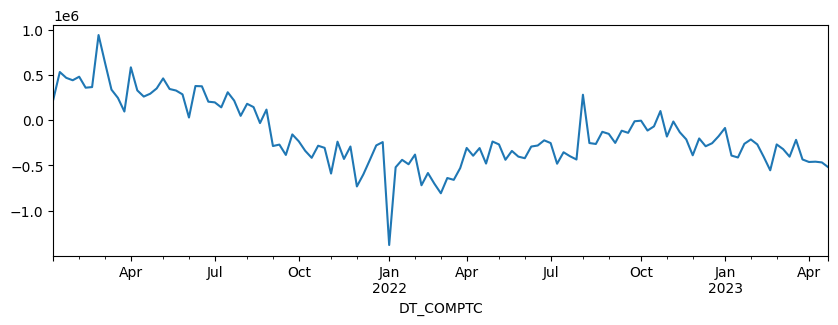

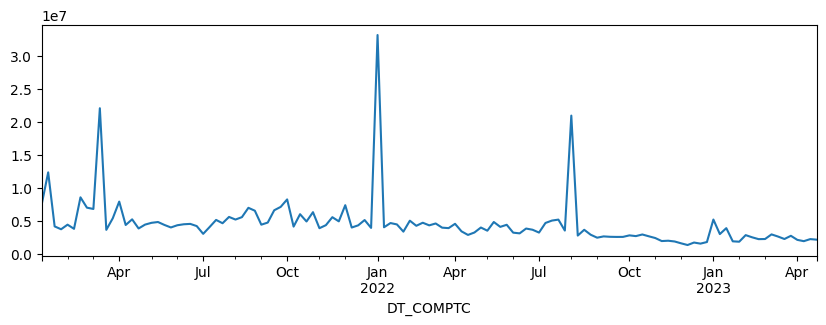

In [14]:
mean.plot(figsize=(10, 3));
plt.show()
std.plot(figsize=(10, 3));

* amostrando e checando algumas features e target de 3 fundos

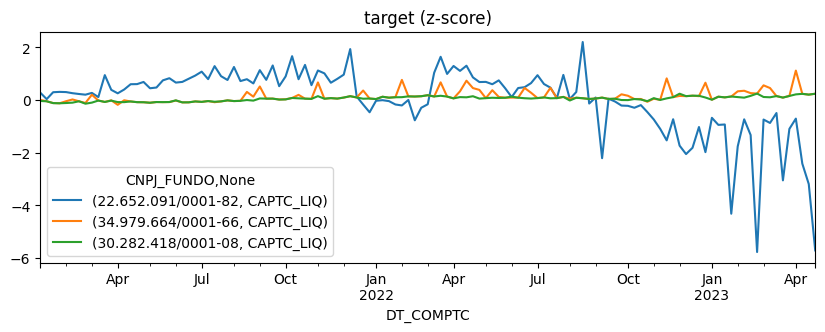

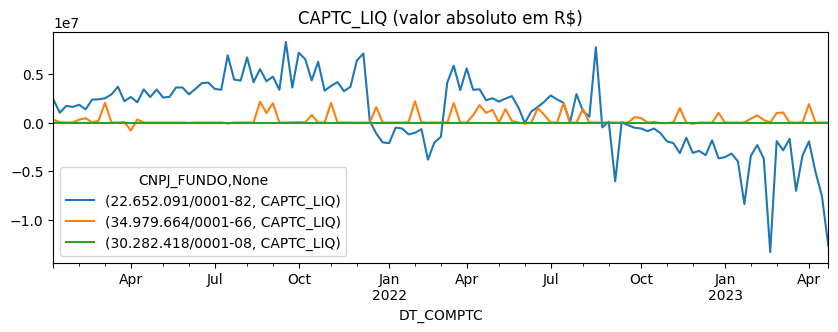

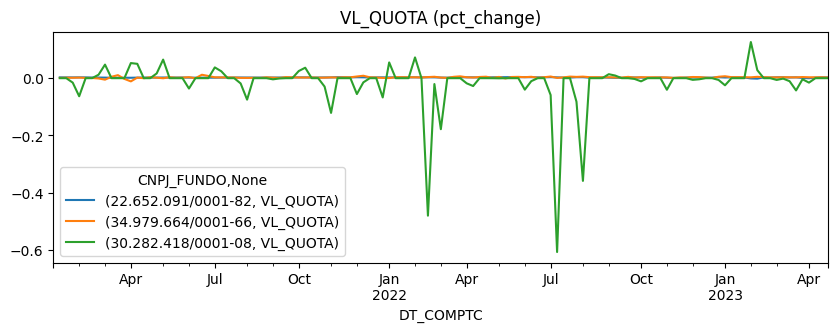

In [15]:
t = target.sample(3, axis=1)
t.plot(figsize=(10, 3), title='target (z-score)');
features.loc[:, idx[t.columns.get_level_values(0), 'CAPTC_LIQ']].plot(figsize=(10,3), title='CAPTC_LIQ (valor absoluto em R$)');
features.loc[:, idx[t.columns.get_level_values(0), 'VL_QUOTA']].pct_change().plot(figsize=(10,3), title='VL_QUOTA (pct_change)');

* deslocando uma semana para formar o target (não é necessário)

In [16]:
# target = target.shift(-1)

* drop do nivel 1 das colunas

In [17]:
target = target.droplevel(axis=1, level=1)

### check qtd fundos

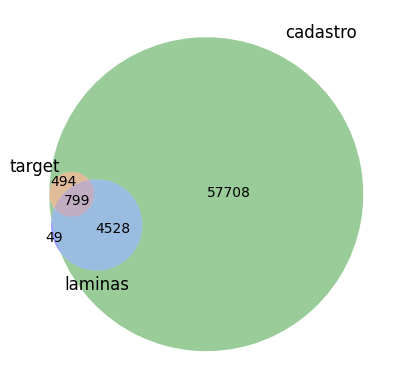

In [18]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

set1 = set(target.columns.get_level_values(0))
set2 = set(cadastro.index)
set3 = set(laminas.index)

fig = plt.figure()
fig.patch.set_facecolor('white')

venn3([set1, set2, set3], ('target', 'cadastro', 'laminas'))

plt.show()

## 5. modelo de Machine Learning  

### 5.1 construindo X e y

In [19]:
import numpy as np
from tensorflow.keras.preprocessing import timeseries_dataset_from_array
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

def timeseries_to_features(features, 
                           ts_slice, 
                           feature_cols, 
                           lookback, 
                           include_target=False, 
                           multiindex_lagged_cols=False, 
                           col_last_level_prefix=None):
    """returns a dataframe with lagged columns. 
    unique column names are assigned (if unique df's are passed in features dict)
    
    if a dataframe with a resampling interval higher than '1min' is passed, all NaNs are dropped
    before lagged features are generated. This encodes longer lookbacks.
    For example if lookback=20 and resample_interval='5min' (see generate_bbands in features_labels_prep.py)
    a total history of 100 minutes are encoded. 
    In each name column, '_1', '_2', ... refer to the timestep in the lag window.
    This refer to 
        * t-1min, t-2min,  ... for a dataset with '1min' granularity, or
        * t-5min, t-10min, ... for a dataset with '5min' granularity (with NaNs in between)
        
    include_target: if True, includes a column with suffix '_0' to be used as the target
                    also, if True, each row index refers to the last feature ts (*NOT* the ts of the target)
                    
    col_last_level_prefix: if input argument `features` is NOT multi-index, adds this prefix to last level (level=-1) of lagged columns
                           example: 'ret', generates lagged columns: ret_6, ret_5,..., ret_1
                           if None, repeats the sliced col as the prefix
                           
    """
    
    if include_target:
        last_ts_idx = -1 #  -1 last idx is '_0', while 0 means last idx is '_1'
        sequence_length = lookback + 1
    else:
        last_ts_idx = 0 
        sequence_length = lookback

    X = list()

    for col in tqdm(feature_cols):
        # print(col)
        input_data = features.loc[ts_slice, col].dropna()
        if len(input_data) <= 1:
            # if length is 1, tensorflow raises error:
            # ValueError: sampling_rate must be higher than 0 and lower than the length of the data. Got: sampling_rate=1 for data of length 1.
            print(f'col {col} with insufficient samples')
            print(input_data)
            continue
        input_dataset = timeseries_dataset_from_array(input_data, None, sequence_length=sequence_length)

        X_col = list() # X_col: X for each col selected
        for batch in input_dataset:
            batch = batch.reshape(batch.shape[0], -1).numpy()
            X_col.append(batch)

        # lagged colnames for the lagged dataframe. if col slicing above return Series, get the name
        input_data_cols = [input_data.name] if isinstance(input_data, pd.Series) else input_data.columns
        # lagged_colnames = [[f'{col}_{subcol}_{l}' if col!=subcol else f'{col}_{l}' for subcol in input_data_cols] for l in range(lookback, last_ts_idx, -1)]
        if col_last_level_prefix is not None:
            lagged_colnames = [[f'{subcol}_{l}' if col!=subcol else f'{col_last_level_prefix}_{l}' for subcol in input_data_cols] for l in range(lookback, last_ts_idx, -1)]
        else:
            lagged_colnames = [[f'{subcol}_{l}' if col!=subcol else f'{col}_{l}' for subcol in input_data_cols] for l in range(lookback, last_ts_idx, -1)]
        lagged_colnames = np.ravel(lagged_colnames)  # flatten
        if multiindex_lagged_cols:
            lagged_colnames = pd.MultiIndex.from_product([[col] , lagged_colnames], names=["CNPJ", "lagged_feature"])

        if X_col: # only if X_col is not empty
            X_col = np.concatenate(X_col)
            X_col = pd.DataFrame(X_col, index=input_data.index[sequence_length-1:], columns=lagged_colnames)
            X.append(X_col)

    X = pd.concat(X, axis=1)
    X = X.reindex(features.loc[ts_slice].index)
    
    if include_target:
        X.index = X.index.shift(-1, freq='W-FRI') # each row index refers to the last feature ts (*NOT* the ts of the target)
    X = X.fillna(method='ffill')

    return X

* capt: contém features (sufixos `'_1', '_2', ...`) e o label (sufixo `'_0'`)

In [20]:
lookback = 6

capt = timeseries_to_features(target, 
                              target.index, target.columns, 
                              lookback, 
                              include_target=True, 
                              multiindex_lagged_cols=True, 
                              col_last_level_prefix='capt')

# drop das linhas que a janela de lookback não traz todos os meses
capt = capt.dropna(how='all')

  0%|          | 1/1293 [00:00<03:09,  6.83it/s]

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



100%|██████████| 1293/1293 [00:47<00:00, 27.11it/s]


* features_lagged (somente sufixos `'_1', '_2', ...`)

In [21]:
features_lagged = timeseries_to_features(features, 
                                         features.index, features.columns.get_level_values(0).unique(), 
                                         lookback, 
                                         include_target=False, 
                                         multiindex_lagged_cols=True)

# drop das linhas que a janela de lookback não traz todos os meses
# obs: o mes mais recente pode estar incompleto (mas ele é dropado no concat com rets devido ao join='inner')
features_lagged = features_lagged.dropna(how='all')

100%|██████████| 1293/1293 [11:36<00:00,  1.86it/s] 


* Xy, X e y

In [22]:
Xy = pd.concat([capt, features_lagged], axis=1, join='inner')
Xy = Xy.sort_index(axis=1).stack(level=0).swaplevel().sort_index()

In [23]:
Xy

lagged_feature                   CAPTC_DIA_1    CAPTC_DIA_2    CAPTC_DIA_3   
CNPJ               DT_COMPTC                                                 
00.089.915/0001-15 2021-02-12  141966.288000  293880.686000   83628.684000  \
                   2021-02-19  198923.956667  141966.288000  293880.686000   
                   2021-02-26  275156.122000  198923.956667  141966.288000   
                   2021-03-05  464891.616000  275156.122000  198923.956667   
                   2021-03-12  911476.726000  464891.616000  275156.122000   
...                                      ...            ...            ...   
41.771.697/0001-81 2023-03-24   29883.252000   25297.512000    1857.898000   
                   2023-03-31   16694.984000   29883.252000   25297.512000   
                   2023-04-07    6281.072500   16694.984000   29883.252000   
                   2023-04-14   80298.108000    6281.072500   16694.984000   
                   2023-04-21    1944.675000   80298.108000    6281.072500   

lagged_feature                   CAPTC_DIA_4  CAPTC_DIA_5  CAPTC_DIA_6   
CNPJ               DT_COMPTC                                             
00.089.915/0001-15 2021-02-12  158175.424000   357136.632   321913.538  \
                   2021-02-19   83628.684000   158175.424   357136.632   
                   2021-02-26  293880.686000    83628.684   158175.424   
                   2021-03-05  141966.288000   293880.686    83628.684   
                   2021-03-12  198923.956667   141966.288   293880.686   
...                                      ...          ...          ...   
41.771.697/0001-81 2023-03-24    4515.652000     7967.700     3656.488   
                   2023-03-31    1857.898000     4515.652     7967.700   
                   2023-04-07   25297.512000     1857.898     4515.652   
                   2023-04-14   29883.252000    25297.512     1857.898   
                   2023-04-21   16694.984000    29883.252    25297.512   

lagged_feature                   CAPTC_LIQ_1    CAPTC_LIQ_2    CAPTC_LIQ_3   
CNPJ               DT_COMPTC                                                 
00.089.915/0001-15 2021-02-12  -45935.516000  127164.028000  -77182.962000  \
                   2021-02-19  -34305.336667  -45935.516000  127164.028000   
                   2021-02-26  187640.206000  -34305.336667  -45935.516000   
                   2021-03-05   63140.610000  187640.206000  -34305.336667   
                   2021-03-12  664218.692000   63140.610000  187640.206000   
...                                      ...            ...            ...   
41.771.697/0001-81 2023-03-24  -19506.330000   16166.260000   -8930.372000   
                   2023-03-31    3246.440000  -19506.330000   16166.260000   
                   2023-04-07   -5244.280000    3246.440000  -19506.330000   
                   2023-04-14   64877.928000   -5244.280000    3246.440000   
                   2023-04-21   -2044.620000   64877.928000   -5244.280000   

lagged_feature                   CAPTC_LIQ_4  CAPTC_LIQ_5  CAPTC_LIQ_6   
CNPJ               DT_COMPTC                                             
00.089.915/0001-15 2021-02-12 -398803.136000    -4233.098    64800.310  \
                   2021-02-19  -77182.962000  -398803.136    -4233.098   
                   2021-02-26  127164.028000   -77182.962  -398803.136   
                   2021-03-05  -45935.516000   127164.028   -77182.962   
                   2021-03-12  -34305.336667   -45935.516   127164.028   
...                                      ...          ...          ...   
41.771.697/0001-81 2023-03-24   -2596.800000     2144.860   -10192.186   
                   2023-03-31   -8930.372000    -2596.800     2144.860   
                   2023-04-07   16166.260000    -8930.372    -2596.800   
                   2023-04-14  -19506.330000    16166.260    -8930.372   
                   2023-04-21    3246.440000   -19506.330    16166.260   

lagged_feature                 NR_COTST_1  N

In [24]:
# ret_0 corresponde ao target
X = Xy.drop('capt_0', axis=1)
y = Xy['capt_0']

In [25]:
# checar: fundos com capt NaN, não deve haver nenhum
Xy[Xy['capt_0'].isnull()].index.get_level_values(0)

Index([], dtype='object', name='CNPJ')

### 5.2 enriquecendo o X com cadastro e/ou laminas (opcional)

In [26]:
# cadastro = cadastro.loc[target.columns]

# DT_cols = cadastro.filter(like='DT_').columns      # extract year
# CNPJ_cols = cadastro.filter(like='CNPJ_').columns  # drop
# INF_TAXA_cols = cadastro.filter(like='INF_TAXA_')  # drop
# TAXA_cols = ['TAXA_PERFM', 'TAXA_ADM']             # numeric - passthrough

# # (biased) manual selection for OHE
# OHE_cols = ['ADMIN', 'AUDITOR', 'CLASSE', 'CONTROLADOR', 'CUSTODIANTE', 'GESTOR', 'RENTAB_FUNDO', 'TRIB_LPRAZO']

# # tf-idf
# DENOM_SOCIAL_col = ['DENOM_SOCIAL']
...

Ellipsis

### 5.3 montando e validando seu modelo
> **essa seção será corrigida**

In [30]:
X

lagged_feature                   CAPTC_DIA_1    CAPTC_DIA_2    CAPTC_DIA_3   
CNPJ               DT_COMPTC                                                 
00.089.915/0001-15 2021-02-12  141966.288000  293880.686000   83628.684000  \
                   2021-02-19  198923.956667  141966.288000  293880.686000   
                   2021-02-26  275156.122000  198923.956667  141966.288000   
                   2021-03-05  464891.616000  275156.122000  198923.956667   
                   2021-03-12  911476.726000  464891.616000  275156.122000   
...                                      ...            ...            ...   
41.771.697/0001-81 2023-03-24   29883.252000   25297.512000    1857.898000   
                   2023-03-31   16694.984000   29883.252000   25297.512000   
                   2023-04-07    6281.072500   16694.984000   29883.252000   
                   2023-04-14   80298.108000    6281.072500   16694.984000   
                   2023-04-21    1944.675000   80298.108000    6281.072500   

lagged_feature                   CAPTC_DIA_4  CAPTC_DIA_5  CAPTC_DIA_6   
CNPJ               DT_COMPTC                                             
00.089.915/0001-15 2021-02-12  158175.424000   357136.632   321913.538  \
                   2021-02-19   83628.684000   158175.424   357136.632   
                   2021-02-26  293880.686000    83628.684   158175.424   
                   2021-03-05  141966.288000   293880.686    83628.684   
                   2021-03-12  198923.956667   141966.288   293880.686   
...                                      ...          ...          ...   
41.771.697/0001-81 2023-03-24    4515.652000     7967.700     3656.488   
                   2023-03-31    1857.898000     4515.652     7967.700   
                   2023-04-07   25297.512000     1857.898     4515.652   
                   2023-04-14   29883.252000    25297.512     1857.898   
                   2023-04-21   16694.984000    29883.252    25297.512   

lagged_feature                   CAPTC_LIQ_1    CAPTC_LIQ_2    CAPTC_LIQ_3   
CNPJ               DT_COMPTC                                                 
00.089.915/0001-15 2021-02-12  -45935.516000  127164.028000  -77182.962000  \
                   2021-02-19  -34305.336667  -45935.516000  127164.028000   
                   2021-02-26  187640.206000  -34305.336667  -45935.516000   
                   2021-03-05   63140.610000  187640.206000  -34305.336667   
                   2021-03-12  664218.692000   63140.610000  187640.206000   
...                                      ...            ...            ...   
41.771.697/0001-81 2023-03-24  -19506.330000   16166.260000   -8930.372000   
                   2023-03-31    3246.440000  -19506.330000   16166.260000   
                   2023-04-07   -5244.280000    3246.440000  -19506.330000   
                   2023-04-14   64877.928000   -5244.280000    3246.440000   
                   2023-04-21   -2044.620000   64877.928000   -5244.280000   

lagged_feature                   CAPTC_LIQ_4  CAPTC_LIQ_5  CAPTC_LIQ_6   
CNPJ               DT_COMPTC                                             
00.089.915/0001-15 2021-02-12 -398803.136000    -4233.098    64800.310  \
                   2021-02-19  -77182.962000  -398803.136    -4233.098   
                   2021-02-26  127164.028000   -77182.962  -398803.136   
                   2021-03-05  -45935.516000   127164.028   -77182.962   
                   2021-03-12  -34305.336667   -45935.516   127164.028   
...                                      ...          ...          ...   
41.771.697/0001-81 2023-03-24   -2596.800000     2144.860   -10192.186   
                   2023-03-31   -8930.372000    -2596.800     2144.860   
                   2023-04-07   16166.260000    -8930.372    -2596.800   
                   2023-04-14  -19506.330000    16166.260    -8930.372   
                   2023-04-21    3246.440000   -19506.330    16166.260   

lagged_feature                 NR_COTST_1  N

In [28]:
y

CNPJ                DT_COMPTC 
00.089.915/0001-15  2021-02-12   -0.046732
                    2021-02-19   -0.107717
                    2021-02-26   -0.084160
                    2021-03-05    0.014859
                    2021-03-12   -0.148275
                                    ...   
41.771.697/0001-81  2023-03-24    0.160729
                    2023-03-31    0.216868
                    2023-04-07    0.274067
                    2023-04-14    0.209104
                    2023-04-21    0.241580
Name: capt_0, Length: 147617, dtype: float64

## 6. Preparando sua submissão  